In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dataset Creation
### Scraping
The primary challenge in developing a robust 3D print failure detector is the lack of large-scale, public, and annotated datasets. Furthermore, 3D printing datasets suffer from severe class imbalance. successful printing states vastly outnumber failure states (spaghetti, layer shifts, or warping).

To address this we've decided to build our own dataset, sourcing raw video data from YouTube. This allowed us to capture a wide variance of printer models, filament colors, and lighting conditions.

Before automated processing, we performed manual data cleaning to ensure class purity.
We gathered 3D prining timelapses and compilation videos and trimmed those videos to only include either good printing/spaghetti faliures.

Since the source videos were often time-lapses (where hours of printing are compressed into minutes), standard frame extraction would result in excessive redundancy. We utilized a custom Python script to extract frames at a rate of 4 Frames Per Second (FPS). This sampling rate was chosen to balance dataset size with sufficient variance for the model to learn form.

The result was the collection of roughly 1000 images for each class, here is an example of two images, one of a good print and one with a "spaghetti" artifact:
<img src="explaination_data/Classification_data/0_good.jpg" width="200" height="300" alt="Alt Text">
<img src="explaination_data/Classification_data/0_spaghetti.jpg" width="300" height="420" alt="Alt Text">

As you can probably tell the images came at a non standard size as videos have different resolution, we then had to downsample these images so we'll have a standard uniform format to feed to our model. Let's take those last two images and downsample them to 224x224 resolution.

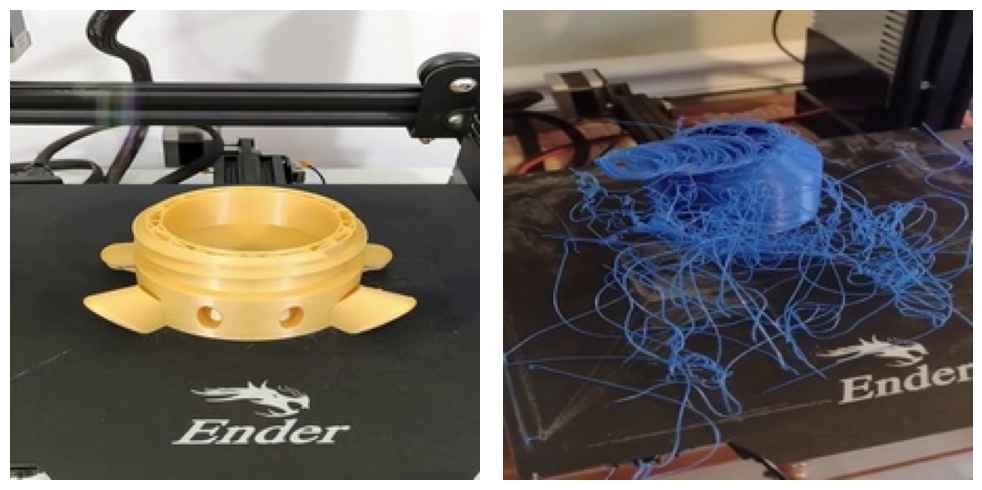

In [ ]:
SIZE_WIDTH = 224
SIZE_HEIGHT = 224
folder = "explaination_data/"
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

files = ["0_good.jpg", "0_spaghetti.jpg"]
for i, filename in enumerate(files):
    # file handling
    file_path = os.path.join(folder, filename)
    base_name = os.path.splitext(filename)[0]
    clean_name = base_name.removeprefix("0")
    new_filename = f"1{clean_name}.jpg"
    save_file_path = os.path.join(folder, new_filename)

    # Process the image if it doesn't exist yet
    if not os.path.exists(save_file_path):
        try:
            with Image.open(file_path) as img:
                resized_img = img.resize((SIZE_WIDTH, SIZE_HEIGHT), Image.Resampling.LANCZOS)
                resized_img.convert('RGB').save(save_file_path, "JPEG", quality=95)
        except Exception as e:
            print(f"Failed to process {filename}: {e}")
            continue

    # Display the processed image
    if os.path.exists(save_file_path):
        image_data = plt.imread(save_file_path)
        axes[i].imshow(image_data)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

